<H1>Random Matrix Theory</H1>

(Sethna, "Entropy, Order Parameters, and Complexity", ex. 1.6, developed with Piet Brouwer)

Â© 2016, James Sethna, all rights reserved.

This is an ipython notebook. This hints file is unusually detailed, but only covers the computational parts (a & f) of the exercise: don't neglect the analytical portions! If you are familiar with Mathematica, feel free to skip parts you don't need, or start your own notebooks.

Lectures about Python, useful both for beginners and experts, can be found at http://scipy-lectures.github.io. 

I recommend installing the [Anaconda](https://store.continuum.io/cshop/academicanaconda) distribution. 

Go to https://www.continuum.io/downloads

Pick your operating system (Windows, Mac OS X, Linux)

Follow instructions for Python 3.5.

To make it run much faster (probably necessary for some assignments):

Be sure not to pay for it! Get an academic subscription, using your Cornell (.edu) e-mail,
from https://www.continuum.io/anaconda-academic-subscriptions-available
   * Set up an account, using your Cornell e-mail
   * Go to My Settings under your name in the upper right hand side
        of the Anaconda Cloud window, and
   * Go to Add Ons, the lowest menu entry in the left-hand column
   * Download the licenses, and follow the installation instructions link
   just above the MKL licence button (or go to
   http://docs.continuum.io/advanced-installation)

Open the notebook by (1) copying this file into a directory, (2) in that directory typing:

    ipython notebook

and (3) selecting the notebook. In later exercises, if you do animations, you may choose to not have the plots inline.

Like Mathematica, you type in commands and then hit 'Shift Return' to execute them.

In [7]:
a = 3.
print(a)

3.0


Python is not a complete scientific environment. Functions like log, sin, and exp are provided by external packages. The plotting package pylab supports many of these; '%matplotlib inline' puts the graphs into the notebook. We usually want more functionality than that, so we import a package called 'numpy'. We'll also be using some of their linear algebra routines, which are in a sub-package 'linalg'. 

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# from numpy.linalg import eigvalsh

One of the most active and unusual applications of ensembles is *random matrix theory*, used to describe phenomena in nuclear physics, mesoscopic quantum mechanics, and wave phenomena. Random matrix theory was invented in a bold attempt to describe the statistics of energy level spectra in nuclei.  In many cases, the statistical behavior of
systems exhibiting complex wave phenomena -- almost any correlations involving eigenvalues and eigenstates -- can be quantitatively modeled using ensembles of matrices with completely random, uncorrelated entries!

The most commonly explored ensemble of matrices is the Gauusian orthogonal ensemble (GOE). Generating a member takes two steps:
   * Generate an NxN matrix whose elements are independent Gaussian distributions of zero mean and standard deviation $\sigma = 1$.
   * Add the matrix to its transpose to symmetrize it.

Start by finding out how Python generates random numbers. Type ?random to find out about scipy's random number generators. 

Try typing 'random.random()' a few times. Try calling it with an integer argument. Use 'hist' (really pylab.hist) to make a histogram of 1000 numbers generated by random.random. Is the distribution Gaussian, uniform, or exponential? The flag 'density' tells us to not just count the number of occurences in each bin, but to divide by the width of the bin and the number of counts (to approximate a normalized probability distribution). 

0.2868557869617757
[0.94026781 0.68368614 0.75591353 0.68525571 0.11942762 0.39720383]


(array([1.03072683, 1.04073388, 0.93065626, 1.01071272, 1.02071977,
        0.90063509, 1.02071977, 0.97068449, 1.12079034, 0.96067743]),
 array([3.13877184e-04, 1.00243361e-01, 2.00172845e-01, 3.00102329e-01,
        4.00031813e-01, 4.99961297e-01, 5.99890781e-01, 6.99820265e-01,
        7.99749748e-01, 8.99679232e-01, 9.99608716e-01]),
 <BarContainer object of 10 artists>)

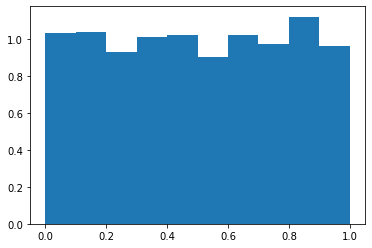

In [9]:
# ?random
print(np.random.random())
print(np.random.random(6))
plt.hist(np.random.random(1000), density=True)

<br/>
<br/>


# 1. (a) & (e) ; Random numbers with Gaussian distribution

Use random.standard_normal to generate a Gaussian distribution of one thousand random numbers. Check that it is a standard Gaussian 
$$\rho(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-x^2/2\sigma^2}$$
by using 'hist'.

[ 1.45335351  0.51773707 -0.98854382 -0.97464947  2.59767333 -0.64405028
  0.43753593 -0.1594365   1.72293546 -1.71947575 -0.51361231  0.39919942
  3.12878324 -0.86900856  1.32772844  0.39044378  1.77637071  0.46662099
  2.01662221  1.71285169 -1.11472695  0.37439503  0.03022801  2.33241279
  0.46043517 -0.69343045  0.35518248  0.23861921 -0.63053363 -0.29015864
  1.31327204  1.07633351  0.54839476  0.39305205  2.66255315 -1.14914715
 -0.74234796  1.67428175 -0.35636605  0.00334611  0.35109426  0.41482666
  1.62404835 -0.18377832  0.65175294 -0.58750543 -0.8142436  -0.84047514
 -0.76381666  0.31324813]


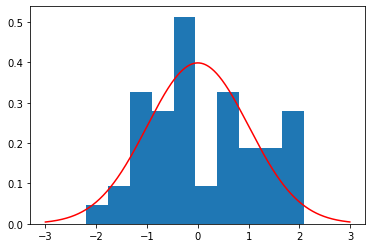

In [10]:
print(np.random.standard_normal(50))
plt.hist(np.random.standard_normal(50), density=True)
x = np.arange(-3,3,0.01)
plt.plot(x,(1./sqrt(2*pi))*exp(-x**2/2),'r')
plt.show()

One final matrix operation. To generate a symmetric matrix of the GOE form, we'll want to add a matrix to its transpose. Generate a 2x3 matrix of normally distributed random numbers, and print it and its transpose.

In [11]:
m = np.random.standard_normal((2,3))
print(m)
print(transpose(m))

[[ 0.4914664  -1.25096617 -1.09356783]
 [ 0.42001032  0.16401887  1.25012826]]
[[ 0.4914664   0.42001032]
 [-1.25096617  0.16401887]
 [-1.09356783  1.25012826]]


Now define a function GOE(N) (using 'def') which generates a GOE NxN matrix.

In [14]:
def GOE(N):
    """
    Creates an NxN element of the Gaussian Orthogonal Ensemble,
    by creating an NxN matrix of Gaussian random variables
      using the random array function random.standard_normal([shape]) 
      with [shape] = (N,N).
    and adding it to its transpose (applying transpose to the matrix)
    #
    Typing GOE(4) a few times, check it's symmetric and random
    """
    m = random.standard_normal((N, N))
    m = m + np.transpose(m)
    return m

Test it by generating a 4x4 matrix. Is it symmetric?

In [15]:
GOE(4)

array([[-2.2006244 , -0.6469589 ,  0.38845814,  2.26651628],
       [-0.6469589 , -0.24468299, -0.47642396, -3.0071309 ],
       [ 0.38845814, -0.47642396,  2.36864763, -1.75831918],
       [ 2.26651628, -3.0071309 , -1.75831918, -0.27267637]])

Now write a function GOE_Ensemble(num, N) generating an ensemble (a long list with 'num' elements) of GOE NxN matrices. Call GOE(N) to fill the list.

In [16]:
def GOE_Ensemble(num, N):
    """
    Creates a list "ensemble" of length num of NxN GOE matrices.
    # 
    You can start with an empty list, and fill it with 'append'
        ensemble = []
        for n in range(num):
            ensemble.append(GOE(N))
        return ensemble
    or you can use the convenient 'list comprehension'
        ensemble = [GOE(N) for n in range(num)]
    #
    Check GOE_Ensemble(3,2) gives 3 2x2 symmetric matrices
    """
    ensemble = [GOE(N) for n in range(num)]
    return ensemble

Here you may want to generate an ensemble, and check if the diagonal elements and the off-diagonal elements have different standard deviations, as you calculated in part (c). (This difference is part of the definition of the GOE ensemble, and is needed to make the ensemble rotation invariant.)

One of the most striking properties that large random matrices share is the distribution of level splittings.

To look at eigenvalues of our symmetric matrices, we use 'eigvalsh'. We'll want them sorted. And we'll want to find the difference between the two middle-most eigenvalues.

Notice, in python, arrays are indexed lambda = [lambda[0], ..., lambda[N-1]], so the middle two are N/2 and N/2-1. Note that in the new version of python dividing integers 4/2 = 2.0 gives a floating point number, so we need to use N//2 to get an integer. (This is a good thing: having 2/10 = 0 causes lots of problems when you write routines that don't know whether their inputs are floats or ints.)

In [18]:
N=4
midpoint = int(N/2)
mat = GOE(N)
print(mat)
eig = sort(np.linalg.eigvalsh(mat))
print(eig)
print(eig[N//2]-eig[N//2-1])

[[-1.64991533  0.47574581  3.42961554  0.65778916]
 [ 0.47574581 -2.83233639 -0.31617841  2.47055852]
 [ 3.42961554 -0.31617841 -1.83893249  0.9632135 ]
 [ 0.65778916  2.47055852  0.9632135  -0.61638866]]
[-5.51445662 -4.14125884  0.2732685   2.44487408]
4.414527341851834


In [21]:
def CenterEigenvalueDifferences(ensemble):
    """
    For each symmetric matrix in the ensemble, calculates the difference 
    between the two center eigenvalues of the ensemble, and returns the
    differences as an array.
    #
    Given an ensemble of symmetric matrices, 
    finds their size N, using the first member ensemble[0]
        len(m) gives the number of rows in m
    starts with an empty list of differences
    for each m in ensemble
      finds the eigenvalues
        eigvals(m) gives the eigenvalues of m
      sorts them
        sort(e) sorts a list from smallest to largest
      appends eigenvalue[N/2] - eigenvalue[N/2-1] to the list
         (Note: python lists go from 0 ... N-1, so for N=2 this 
          gives the difference between the only two eigenvalues)
    #
    Check 
       ensemble = GOE_Ensemble(3,2)
       CenterEigenvalueDifferences(ensemble) 
    gives three positive numbers, that look like eigenvalues of the 2x2 matrices
    """
    # Size of matrix
    N = len(ensemble[0])
    diffs = []
    # Note that you can 'iterate' not only over integers, but over elements of a list (for mat in ensemble: ...)
    for mat in ensemble:
        eigenvalues = sort(np.linalg.eigvalsh(mat))
        diffs.append(eigenvalues[N//2] - eigenvalues[N//2-1])
        
    return diffs

Check that

       ensemble = GOE_Ensemble(3,2)
       CenterEigenvalueDifferences(ensemble) 
       
gives three positive numbers, that look like eigenvalue differences of 2x2 matrices, Check that

        hist(CenterEigenvalueDifferences(ensemble), bins=30, density=True);

gives three spikes at the three eigenvalue differences. 

In [ ]:
ensemble = GOE_Ensemble(3, 2)
print(CenterEigenvalueDifferences(ensemble))
plt.hist(CenterEigenvalueDifferences(ensemble), bins=50, density=True)

Now try it with 10000 or more. Notice the smooth distribution, with a linear tail near zero.

In [ ]:
M = 10000
N = 2
ensemble = GOE_Ensemble(M, N)
diffs = CenterEigenvalueDifferences(ensemble)
plt.hist(diffs, bins=50, density=True)

What is this dip in the eigenvalue splitting probability near zero? It is called *level repulsion*.

Wigner's surmise (meaning 'guess') was that this distribution was <strong>universal</strong>, that is, independent of the ensemble of matrices. Clearly another ensemble, with all our matrix elements multiplied by two, will have eigenvalue differences twice as big. Wigner surmised that the eigenvalue differences, <em>divided by the mean of the differences</em> would be universal. Plot these normalized centered differences against your analytical prediction for 2x2 matrices (see text), which should be $\rho_{Wigner}(s) = (\pi s/2) \exp(-\pi s^2 / 4)$

Text(0.5, 1.0, '2x2 matrix eig diffs')

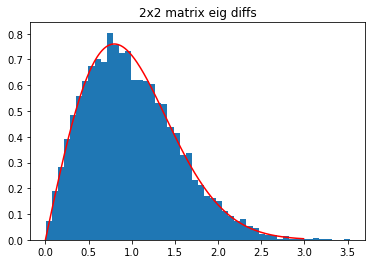

In [28]:
plt.hist(diffs/mean(diffs), bins=50, density=True)          # 2024.10.1. Jungeun Kim -- modify from `normed=True` to `density=True`, python 3.9.
s = np.arange(0.,3.,0.01)
rhoWigner = 0.5 * np.pi * s * np.exp(- 0.25 * np.pi * (s**2))
plt.plot(s, rhoWigner, 'r')
plt.title('2x2 matrix eig diffs')

In [42]:
# 2024.10.1. Jungeun Kim
## Define a function for plot.
def Matrix_eigenvalue_difference(M, N) :
    plt.figure(figsize=(8,6))
    ensemble = GOE_Ensemble(M, N)                                                   # Generate Gaussian orthogonal ensemble (GOE), N by N matrix with M particles.
    diffs = CenterEigenvalueDifferences(ensemble)                                   # Compute the eigenvalue difference of the matrix.

    plt.hist(diffs/mean(diffs), bins=50, density=True, label='Histogram')           # 2024.10.1. Jungeun Kim -- modify from `normed=True` to `density=True`, python 3.9.
    s = np.arange(0., 3., 0.01)                                                     # s = lambda/<lambda>
    rhoWigner = 0.5 * np.pi * s * np.exp(- 0.25 * np.pi * (s**2))                   # Wigner's distribution equation
    plt.plot(s, rhoWigner, 'r', label='Wigner eq.')
    plt.title('{}x{} matrix eigenvalue differences (M = {})'.format(N, N, M))
    plt.legend()
    plt.xlabel(r'$s = \lambda/<\lambda>$')
    plt.ylabel("Counts")
    plt.plot()

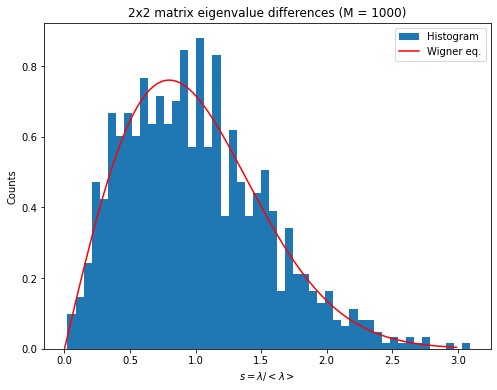

In [44]:
M = 1000
N = 2
Matrix_eigenvalue_difference(M, N)

Try N=4 and N=10; do they look similar?

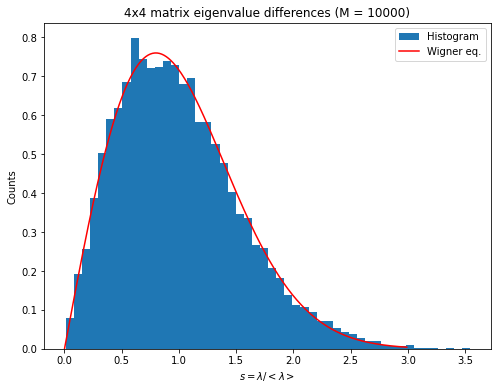

In [45]:
M = 10000
N = 4
# ensemble = ...
# diffs = ...
# hist(...);
# plot(...);
# title(...)
Matrix_eigenvalue_difference(M, N)

<br/>
<br/>


# 2. (f): random number with $\pm 1$.

Now define a function GOE(N) (using 'def') which generates a GOE NxN matrix.

In [74]:
# 2024.10.1. Jungeun Kim
def GOE_pm1(N):
    """
    Creates an NxN element of the Gaussian Orthogonal Ensemble,
    by creating an NxN matrix of Gaussian random variables
      using the random array function random.standard_normal([shape]) 
      with [shape] = (N,N).
    and adding it to its transpose (applying transpose to the matrix)
    #
    Typing GOE(4) a few times, check it's symmetric and random
    """
    m = np.zeros((N, N))                      # N by N zero matrix
    # print(m)

    # m with +- 1.
    for i in range(0, N) :
      for j in range(0, N) :
        if m[j][i] != 0 :                     # If there is a non-zero value in transpose component, use the value.
          m[i][j] = m[j][i]
        elif np.random.random() < 0.5 :       # generate random number and assign +- 1 depends on its value. Range of np.random is [0, 1).
          m[i][j] = -1
        else :
          m[i][j] = 1
    # print(m)
    return m

Test it by generating a 4x4 matrix. Is it symmetric?

In [67]:
GOE_pm1(4)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 1.  1.  1. -1.]
 [ 1. -1. -1.  1.]
 [ 1. -1.  1.  1.]
 [-1.  1.  1. -1.]]


array([[ 1.,  1.,  1., -1.],
       [ 1., -1., -1.,  1.],
       [ 1., -1.,  1.,  1.],
       [-1.,  1.,  1., -1.]])

Now write a function GOE_Ensemble(num, N) generating an ensemble (a long list with 'num' elements) of GOE NxN matrices. Call GOE(N) to fill the list.

In [68]:
def GOE_Ensemble_pm1(num, N):
    """
    Creates a list "ensemble" of length num of NxN GOE matrices.
    # 
    You can start with an empty list, and fill it with 'append'
        ensemble = []
        for n in range(num):
            ensemble.append(GOE(N))
        return ensemble
    or you can use the convenient 'list comprehension'
        ensemble = [GOE(N) for n in range(num)]
    #
    Check GOE_Ensemble(3,2) gives 3 2x2 symmetric matrices
    """
    ensemble = [GOE_pm1(N) for n in range(num)]
    return ensemble

Here you may want to generate an ensemble, and check if the diagonal elements and the off-diagonal elements have different standard deviations, as you calculated in part (c). (This difference is part of the definition of the GOE ensemble, and is needed to make the ensemble rotation invariant.)

In [69]:
def CenterEigenvalueDifferences_pm1(ensemble):
    """
    For each symmetric matrix in the ensemble, calculates the difference 
    between the two center eigenvalues of the ensemble, and returns the
    differences as an array.
    #
    Given an ensemble of symmetric matrices, 
    finds their size N, using the first member ensemble[0]
        len(m) gives the number of rows in m
    starts with an empty list of differences
    for each m in ensemble
      finds the eigenvalues
        eigvals(m) gives the eigenvalues of m
      sorts them
        sort(e) sorts a list from smallest to largest
      appends eigenvalue[N/2] - eigenvalue[N/2-1] to the list
         (Note: python lists go from 0 ... N-1, so for N=2 this 
          gives the difference between the only two eigenvalues)
    #
    Check 
       ensemble = GOE_Ensemble(3,2)
       CenterEigenvalueDifferences(ensemble) 
    gives three positive numbers, that look like eigenvalues of the 2x2 matrices
    """
    # Size of matrix
    N = len(ensemble[0])
    diffs = []
    # Note that you can 'iterate' not only over integers, but over elements of a list (for mat in ensemble: ...)
    for mat in ensemble:
        eigenvalues = sort(np.linalg.eigvalsh(mat))
        diffs.append(eigenvalues[N//2] - eigenvalues[N//2-1])
        
    return diffs

Check that

       ensemble = GOE_Ensemble(3,2)
       CenterEigenvalueDifferences(ensemble) 
       
gives three positive numbers, that look like eigenvalue differences of 2x2 matrices, Check that

        hist(CenterEigenvalueDifferences(ensemble), bins=30, density=True);

gives three spikes at the three eigenvalue differences. 

Now try it with 10000 or more. Notice the smooth distribution, with a linear tail near zero.

What is this dip in the eigenvalue splitting probability near zero? It is called *level repulsion*.

In [75]:
# 2024.10.1. Jungeun Kim
## Define a function for plot.
def Matrix_eigenvalue_difference_pm1(M, N) :
    plt.figure(figsize=(8,6))
    ensemble = GOE_Ensemble_pm1(M, N)                                                   # Generate Gaussian orthogonal ensemble (GOE), N by N matrix with M particles.
    diffs = CenterEigenvalueDifferences_pm1(ensemble)                                   # Compute the eigenvalue difference of the matrix.

    plt.hist(diffs/mean(diffs), bins=50, density=True, label='Histogram')           # 2024.10.1. Jungeun Kim -- modify from `normed=True` to `density=True`, python 3.9.
    s = np.arange(0., 3., 0.01)                                                     # s = lambda/<lambda>
    rhoWigner = 0.5 * np.pi * s * np.exp(- 0.25 * np.pi * (s**2))                   # Wigner's distribution equation
    plt.plot(s, rhoWigner, 'r', label='Wigner eq.')
    plt.title(r'{}x{} matrix w/ $\pm 1$ eigenvalue differences (M = {})'.format(N, N, M))
    plt.legend()
    plt.xlabel(r'$s = \lambda/<\lambda>$')
    plt.ylabel("Counts")
    plt.plot()

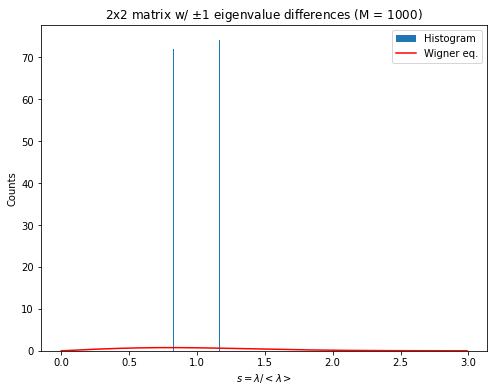

In [76]:
M = 1000
N = 2
Matrix_eigenvalue_difference_pm1(M, N)

Try N=4 and N=10; do they look similar?

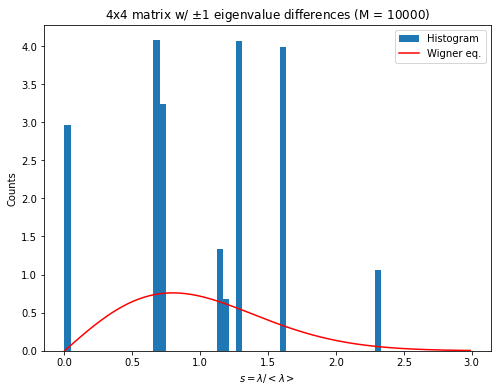

In [78]:
M = 10000
N = 4
# ensemble = ...
# diffs = ...
# hist(...);
# plot(...);
# title(...)
Matrix_eigenvalue_difference_pm1(M, N)

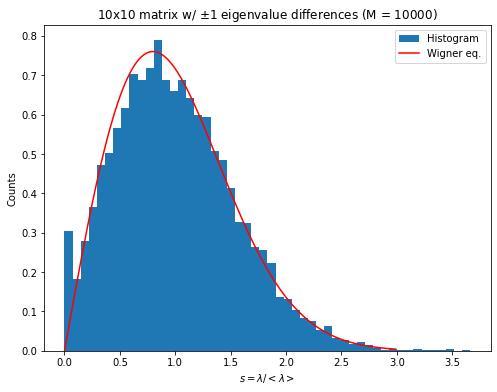

In [79]:
M = 10000
N = 10
# ensemble = ...
# diffs = ...
# hist(...);
# plot(...);
# title(...)
Matrix_eigenvalue_difference_pm1(M, N)